# **Feature Selection Techniques**

**1. Constant Feature —-> (variance is zero or close to zero)**

Variance Threshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/aug_test.csv")
data=data.dropna()
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
11,9272,city_90,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10/49,Pvt Ltd,2,51
12,14249,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,100-500,Other,never,48
16,7865,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,Pvt Ltd,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,10726,city_71,0.884,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Public Sector,1,16
2115,13833,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,1,8
2117,21500,city_44,0.725,Male,No relevent experience,Part time course,Graduate,STEM,7,<10,Early Stage Startup,never,160
2121,27163,city_173,0.878,Male,No relevent experience,no_enrollment,Masters,STEM,16,<10,Pvt Ltd,>4,58


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 3 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             1019 non-null   int64  
 1   city                    1019 non-null   object 
 2   city_development_index  1019 non-null   float64
 3   gender                  1019 non-null   object 
 4   relevent_experience     1019 non-null   object 
 5   enrolled_university     1019 non-null   object 
 6   education_level         1019 non-null   object 
 7   major_discipline        1019 non-null   object 
 8   experience              1019 non-null   object 
 9   company_size            1019 non-null   object 
 10  company_type            1019 non-null   object 
 11  last_new_job            1019 non-null   object 
 12  training_hours          1019 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 111.5+ KB


In [ ]:
data2=data[["enrollee_id","city_development_index","training_hours"]]

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.2)
var_thres.fit(data2)


VarianceThreshold(threshold=0.2)

In [ ]:
var_thres.get_support()


array([ True, False,  True])

In [ ]:
data2.columns[var_thres.get_support()]

Index(['enrollee_id', 'training_hours'], dtype='object')

In [ ]:
data2=data2[data2.columns[var_thres.get_support()]]
data2

,enrollee_id,training_hours
3,27385,39
4,27724,72
11,9272,51
12,14249,48
16,7865,4
...,...,...
2113,10726,16
2115,13833,8
2117,21500,160
2121,27163,58


**2. Feature Selection- With Correlation**

In this step we will be removing the features which are highly correlated.

**Note** : If Features are highly correlated with dependent variables , then we don’t remove that.



In [ ]:
import matplotlib.pyplot as plt
data.corr()

,enrollee_id,city_development_index,training_hours
enrollee_id,1.000000,-0.046126,0.022179
city_development_index,-0.046126,1.000000,0.004536
training_hours,0.022179,0.004536,1.000000


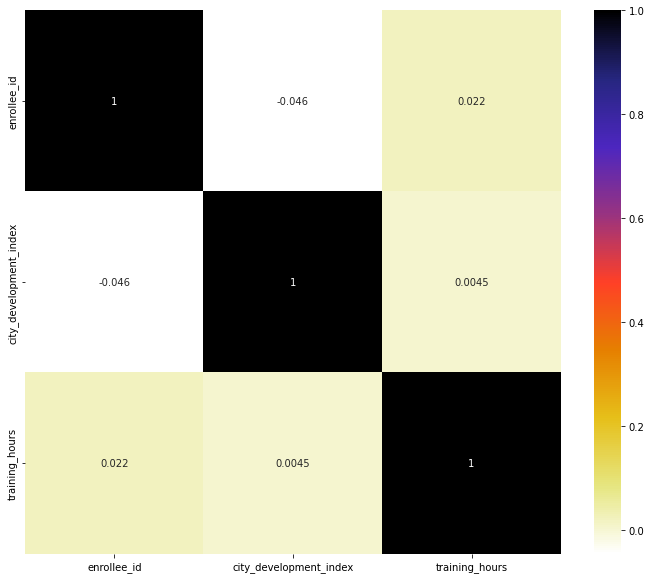

In [ ]:
import seaborn as sns
#Using Pearson Correlation
 
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
corr_features = correlation(data, 0.7)
 
corr_features


set()

**It returns an empty set as there was not any highly correlaed feature**

# **Entropy**  — Measures the purity of split


The Mathematical formula for Entropy is as follows 

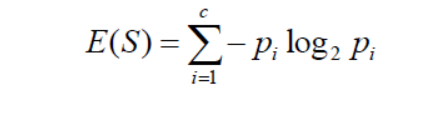


It’s value ranges from 0 (Best) to 1 (worst)


# **Information gain:**
 
Information gain is calculated by comparing the entropy of the dataset before and after a transformation
 

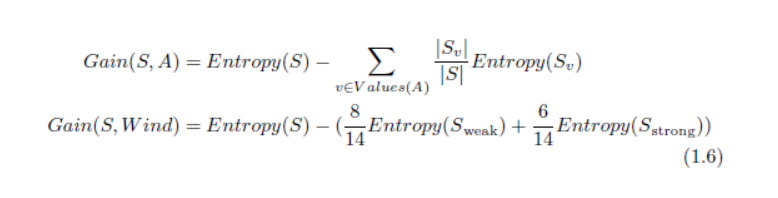

 
Note : More the value , Better the Decision


# **Gini Impurity**

The Gini impurity measure is one of the methods used in decision tree
algorithms to decide the optimal split from a root node, and subsequent
Splits.

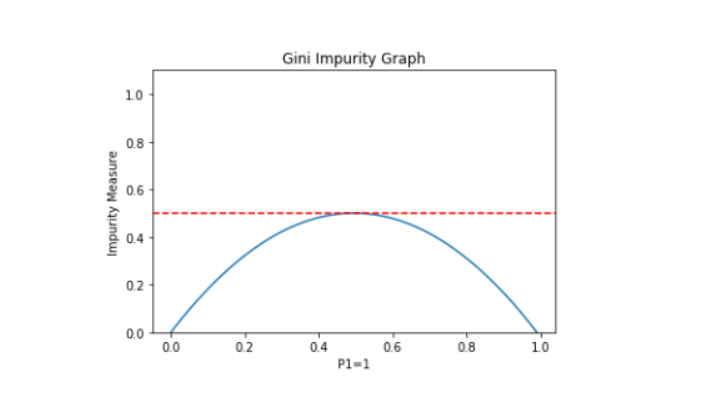

Gini impurity =  1 –  Gini
Here is the sum of squares of success probabilities of each class and is given as:

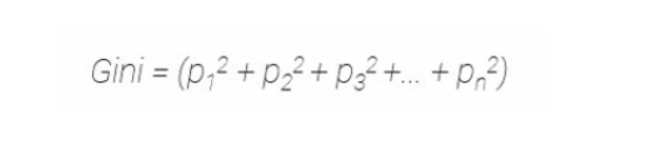

3. **Information gain** - mutual information In Classification Problem Statements

MI Estimate mutual information for a discrete target variable.  (        0 <  MI Value < 1 )
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.
 
I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.


In [ ]:
dataset2=pd.read_csv("/content/train.csv")
dataset2=dataset2.drop(["Name","Ticket","Cabin"],axis=1)
col=dataset2.columns
dataset2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
datset2=dataset2.dropna()
d=pd.get_dummies(datset2[["Sex","Embarked"]],drop_first=True)
dataset=pd.concat([dataset2,d],axis=1,ignore_index=True)
dataset=dataset.dropna()
dataset

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,3,male,22.0,1,0,7.2500,S,1.0,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,C,0.0,0.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,5,0,3,male,35.0,0,0,8.0500,S,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,0.0,1.0,0.0
886,887,0,2,male,27.0,0,0,13.0000,S,1.0,0.0,1.0
887,888,1,1,female,19.0,0,0,30.0000,S,0.0,0.0,1.0
889,890,1,1,male,26.0,0,0,30.0000,C,1.0,0.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       712 non-null    int64  
 1   1       712 non-null    int64  
 2   2       712 non-null    int64  
 3   3       712 non-null    object 
 4   4       712 non-null    float64
 5   5       712 non-null    int64  
 6   6       712 non-null    int64  
 7   7       712 non-null    float64
 8   8       712 non-null    object 
 9   9       712 non-null    float64
 10  10      712 non-null    float64
 11  11      712 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 72.3+ KB


In [ ]:
X_train=dataset.drop([11],axis=1)
y_train=dataset[11]

In [ ]:
X_train=X_train.drop([3,8],axis=1)

In [ ]:
y_train

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
885    0.0
886    1.0
887    1.0
889    0.0
890    0.0
Name: 11, Length: 712, dtype: float64

In [ ]:
# For classification problem:
 
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.        , 0.00937933, 0.04057221, 0.00537347, 0.        ,
       0.        , 0.25473284, 0.00826828, 0.06495419])

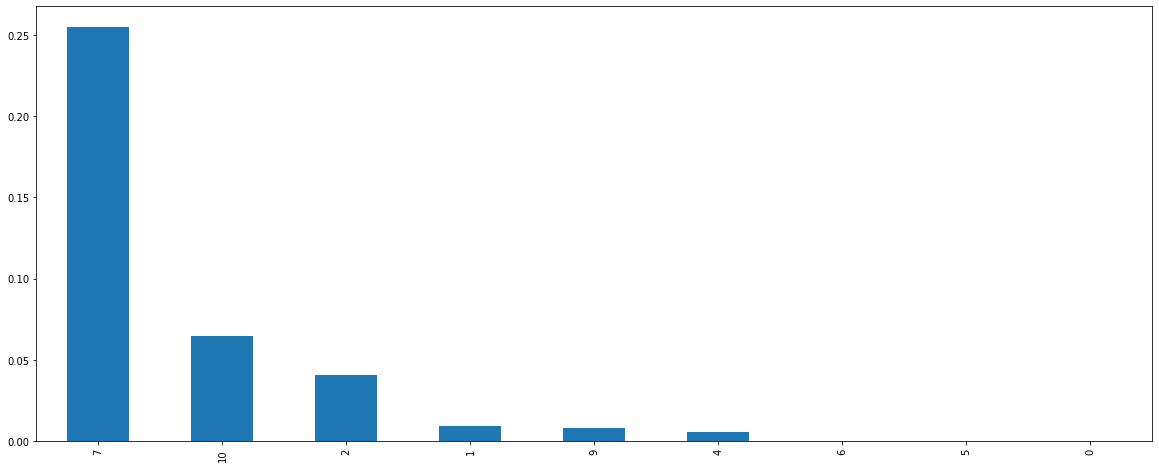

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False) #To get a series with column names corresponding to MI value.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)) # To plot a bar graph of those MI values.


In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]


Int64Index([2, 6, 7, 9, 10], dtype='int64')

**4. Feature Selection-Information gain - mutual information In Regression Problem Statements**


In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info


array([0.        , 0.02190518, 0.06544334, 0.        , 0.        ,
       0.02034414, 0.23603082, 0.        , 0.07081006])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


7     0.236031
10    0.070810
2     0.065443
1     0.021905
6     0.020344
9     0.000000
5     0.000000
4     0.000000
0     0.000000
dtype: float64

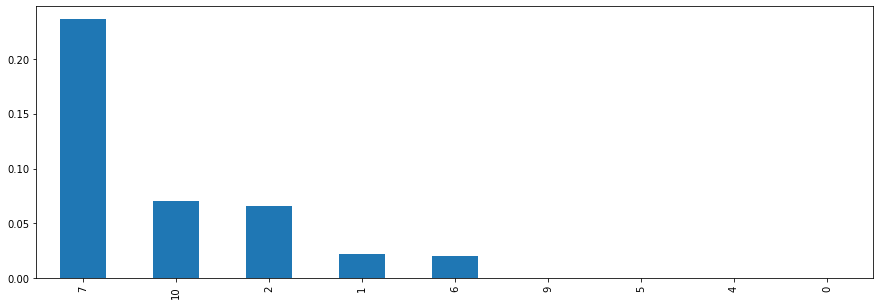

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))



In [ ]:
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

X_train.columns[selected_top_columns.get_support()]


Int64Index([7, 10], dtype='int64')

**5. Fisher Score- Chi Square Test For Feature Selection**


Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.


In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)  # —----> Gives two output (Fscore and the p value)


**Note** : More F score , Better the feature is while reverse for P-value


In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values


0     1.336746e-01
1     1.059137e-03
2     3.183542e-03
4     7.105562e-02
5     5.114859e-01
6     6.461319e-01
7     0.000000e+00
9     7.918342e-02
10    3.825666e-23
dtype: float64

**6. Using VIF Score**

**7. RFE (Recursive Feature Elimination)**
 
RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.
 
RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
 
 
# Initiate LogisticRegression()
logreg = LogisticRegression()
 
 # Initialise RFE 
rfe = RFE(logreg) 
rfe = rfe.fit(X_train,y_train)
 
# Printing the boolean results
print( rfe.support_) 
# Printing the ranking
print(  rfe.ranking_)  



[False  True  True False False False False  True  True]
[6 1 1 4 2 3 5 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
 X_train.columns[(rfe.support_)] # —--> Gives a list of columns which are in   support 
 
 

Int64Index([1, 2, 9, 10], dtype='int64')

# **PCA (Principal component Analysis)**

The idea of PCA (Principal component analysis) is simple—reduce the dimensionality of a dataset, while preserving as much ‘variability’ (i.e. statistical information) as possible.

It’s not a machine learning algorithm but instead a unsupervised learning algorithm

As the number of dimensions increases , it is a corse.

Dimension increases , accuracy decreases


Requirements

**Standardisation is required**


**Implementation (using sklearn)**

In [ ]:

# from sklearn.decomposition import PCA

# pca = PCA(n_conponents=n)

# pca.fit_transform(df)


**Implementation (normal method)**

Find the covariance matrix of the dataset by multiplying the matrix of features by its transpose. 

In [ ]:
# covar_matrix = np.matmul(sample_data.T , sample_data)
# from scipy.linalg import eigh 
 
# # eigh function will return the eigenvalues in ascending order
# values, vectors = eigh(covar_matrix,eigvals=(782,783))
# # This code generates only the top 2 (782 and 783) eigenvalues.
 
 
# vectors = vectors.T
 
# # here the vectors[1] represent the eigenvector corresponding 1st principal eigenvector
# # here the vectors[0] represent the eigenvector corresponding 2nd principal eigenvector
 
# new_coordinates = np.matmul(vectors,sample_data.T)
# new_coordinates = np.vstack((new_coordinates, labels)).T


**Maths behind PCA**

First calculate the mean of all features.


Then create a covariance matrix.

It is a measure of how much each of the dimensions vary from the mean with respect to each other.

The covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions, e.g., relationship between the height and weight of students.

A positive value of covariance indicates that both the dimensions are directly proportional to each other, whereas if one dimension increases the other dimension increases accordingly.

A negative value of covariance indicates that both the dimensions are indirectly proportional to each other, where if one dimension increases then other dimension decreases accordingly.

If in case the covariance is zero, then the two dimensions are independent of each other.

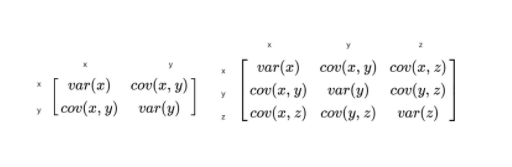


cov(x,y)=summation from 1 to n of ((x-xmean)*(y-ymean)/(n-1))


A-kI=0   —--> To get the eigenvalues.

 
The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.
The eigenvectors and eigenvalues of the covariance matrix will give the principal components and a vector that we can use to project high-dimensional inputs to the lower-dimensional subspace.



The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.


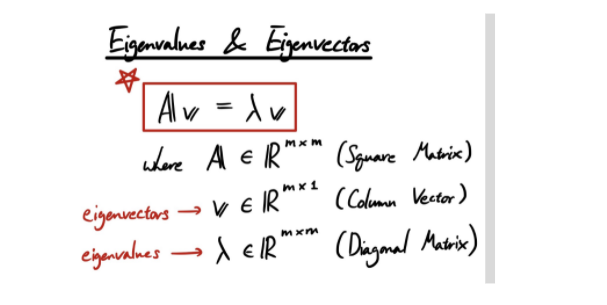


Plotting the 2d data points with seaborn


In [1]:
# import seaborn as sns
# g=sns.FacetGrid(dataframe,hue="labels",size=7).map_dataframe(sns.scatterplot, x="lst_principal", y="2nd_principal")
# g.add_legend()
